# GENERACIÓN DATASET PRIMER MES

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

import scipy.stats as stats
import seaborn as sns
from scipy.interpolate import interp1d

from datetime import date
from datetime import datetime
from datetime import timedelta


In [52]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:

# Abrir y cargar el fichero JSON
synthetic_FirstMonth = pd.read_csv('wearable-primerMes-knn-syn.csv')

# Mostrar el DataFrame
print(synthetic_FirstMonth)

        user_id   Age            timestamp  DiastolicBP  SystolicBP  \
0     user_0000  32.0  2024-06-16 02:45:05    89.000000  134.000000   
1     user_0000  32.0  2024-06-16 10:45:05    87.000000  130.166667   
2     user_0000  32.0  2024-06-16 18:45:05    87.000000  130.166667   
3     user_0000  31.0  2024-06-18 07:37:54    87.000000  133.000000   
4     user_0000  31.0  2024-06-18 15:37:54    86.333333  131.166667   
...         ...   ...                  ...          ...         ...   
1202  user_0099  32.0  2024-06-13 16:00:00    86.333333  131.000000   
1203  user_0099  32.0  2024-06-13 23:22:02    86.333333  131.000000   
1204  user_0099  32.0  2024-06-28 08:00:00    86.333333  131.000000   
1205  user_0099  32.0  2024-06-28 16:00:00    87.000000  130.166667   
1206  user_0099  32.0  2024-06-28 17:20:22    84.000000  134.000000   

              BS   BodyTemp   HeartRate         day month&year  
0     148.614941  98.696800  100.000000  2024-06-16    2024-06  
1     149.878696 

In [13]:

# Abrir y cargar el fichero JSON
synthetic_FirstMonth = pd.read_csv('wearable-primerMes-knn-syn.csv')

# Mostrar el DataFrame
print(synthetic_FirstMonth)

        user_id   Age            timestamp  DiastolicBP  SystolicBP  \
0     user_0000  32.0  2024-06-16 02:45:05    89.000000  134.000000   
1     user_0000  32.0  2024-06-16 10:45:05    87.000000  130.166667   
2     user_0000  32.0  2024-06-16 18:45:05    87.000000  130.166667   
3     user_0000  31.0  2024-06-18 07:37:54    87.000000  133.000000   
4     user_0000  31.0  2024-06-18 15:37:54    86.333333  131.166667   
...         ...   ...                  ...          ...         ...   
1202  user_0099  32.0  2024-06-13 16:00:00    86.333333  131.000000   
1203  user_0099  32.0  2024-06-13 23:22:02    86.333333  131.000000   
1204  user_0099  32.0  2024-06-28 08:00:00    86.333333  131.000000   
1205  user_0099  32.0  2024-06-28 16:00:00    87.000000  130.166667   
1206  user_0099  32.0  2024-06-28 17:20:22    84.000000  134.000000   

              BS   BodyTemp   HeartRate         day month&year  
0     148.614941  98.696800  100.000000  2024-06-16    2024-06  
1     149.878696 

In [17]:
synthetic_FirstMonth.head()

,user_id,Age,timestamp,DiastolicBP,SystolicBP,BS,BodyTemp,HeartRate,day,month&year
0,user_0000,32.0,2024-06-16 02:45:05,89.000000,134.000000,148.614941,98.696800,100.000000,2024-06-16,2024-06
1,user_0000,32.0,2024-06-16 10:45:05,87.000000,130.166667,149.878696,98.711909,108.166667,2024-06-16,2024-06
2,user_0000,32.0,2024-06-16 18:45:05,87.000000,130.166667,149.878696,98.711909,108.166667,2024-06-16,2024-06
3,user_0000,31.0,2024-06-18 07:37:54,87.000000,133.000000,159.415316,98.843603,121.000000,2024-06-18,2024-06
4,user_0000,31.0,2024-06-18 15:37:54,86.333333,131.166667,143.821881,98.870108,102.000000,2024-06-18,2024-06


In [15]:
secondMonth = pd.read_csv('second-month-generation.csv')

In [23]:
secondMonth.head()

,user_id,Age,timestamp,DiastolicBP,SystolicBP,BS,BodyTemp,HeartRate,day,month&year
0,user_0001,20.0,2024-07-01 02:45:05,85.0,130.0,200.0,98.020946,148.0,2024-07-01,2024-07
1,user_0001,20.0,2024-07-01 10:45:05,85.0,130.0,200.0,98.020946,148.0,2024-07-01,2024-07
2,user_0001,20.0,2024-07-01 18:45:05,85.0,130.0,200.0,98.020946,148.0,2024-07-01,2024-07
3,user_0001,20.0,2024-07-02 02:45:05,84.0,129.0,202.0,98.024046,150.0,2024-07-02,2024-07
4,user_0001,20.0,2024-07-02 10:45:05,84.0,129.0,202.0,98.024046,150.0,2024-07-02,2024-07


In [19]:
thirdMonth = pd.read_csv('third-month-generation.csv')

In [25]:
thirdMonth.head()

,user_id,Age,timestamp,DiastolicBP,SystolicBP,BS,BodyTemp,HeartRate,day,month&year
0,user_0001,25.0,2024-08-01 02:45:05,85.0,129.0,156.614941,98.696800,101.0,2024-08-01,2024-08
1,user_0001,25.0,2024-08-01 10:45:05,85.0,129.0,156.614941,98.696800,101.0,2024-08-01,2024-08
2,user_0001,25.0,2024-08-01 18:45:05,85.0,129.0,156.614941,98.696800,101.0,2024-08-01,2024-08
3,user_0001,25.0,2024-08-02 02:45:05,86.0,130.0,157.878696,98.711909,102.0,2024-08-02,2024-08
4,user_0001,25.0,2024-08-02 10:45:05,86.0,130.0,157.878696,98.711909,102.0,2024-08-02,2024-08


In [74]:
#combinamos datasets pata generar dataset del primer trimestre 
def combine_monthly_datasets(dataset_list):
    """
    Combina los datasests mensuales en un único dataframe
    ARGS:
        - dataset_list: lista con los nombres de los datasets a combinar
    RETURNS:
        - Dataframe combinado
    """
    combined_df = pd.concat(dataset_list, ignore_index=True)
    return combined_df

In [76]:
lista = [synthetic_FirstMonth, secondMonth, thirdMonth]
firstTrimester = combine_monthly_datasets(lista)
firstTrimester.head()

,user_id,Age,timestamp,DiastolicBP,SystolicBP,BS,BodyTemp,HeartRate,day,month&year
0,user_0000,32.0,2024-06-16 02:45:05,89.000000,134.000000,148.614941,98.696800,100.000000,2024-06-16,2024-06
1,user_0000,32.0,2024-06-16 10:45:05,87.000000,130.166667,149.878696,98.711909,108.166667,2024-06-16,2024-06
2,user_0000,32.0,2024-06-16 18:45:05,87.000000,130.166667,149.878696,98.711909,108.166667,2024-06-16,2024-06
3,user_0000,31.0,2024-06-18 07:37:54,87.000000,133.000000,159.415316,98.843603,121.000000,2024-06-18,2024-06
4,user_0000,31.0,2024-06-18 15:37:54,86.333333,131.166667,143.821881,98.870108,102.000000,2024-06-18,2024-06


In [289]:
firstTrimester.to_csv("firstTrimester.csv", index=False)

Vamos a eliminar la columna "month&year" porque tiene la misma información que day, sólo que sin el día. 

In [292]:
# Calcular el min y max timestamp para cada usuario
user_timestamp_range = firstTrimester.groupby("user_id")["timestamp"].agg(["min", "max"]).reset_index()

# Mostrar el rango de timestamps para cada usuario
print(user_timestamp_range)

      user_id                 min                 max
0   user_0000 2024-06-16 02:45:05 2024-06-30 20:58:55
1   user_0001 2024-06-05 08:00:00 2024-08-05 18:45:05
2   user_0002 2024-06-14 08:00:00 2024-08-04 18:45:05
3   user_0003 2024-07-01 02:45:05 2024-08-07 18:45:05
4   user_0004 2024-06-13 08:00:00 2024-08-04 18:45:05
..        ...                 ...                 ...
92  user_0095 2024-06-12 12:15:36 2024-06-30 16:22:27
93  user_0096 2024-06-10 12:02:41 2024-06-28 21:26:36
94  user_0097 2024-06-16 08:00:00 2024-06-30 13:39:36
95  user_0098 2024-06-19 08:00:00 2024-06-19 18:44:41
96  user_0099 2024-06-13 15:22:02 2024-06-28 17:20:22

[97 rows x 3 columns]


In [294]:
min_timestamp = firstTrimester["timestamp"].min()
max_timestamp = firstTrimester["timestamp"].max()
print(min_timestamp, max_timestamp)

2024-06-01 14:38:44 2024-09-02 18:45:05


In [296]:
# Contar el número de usuarios únicos por día
conteo_usuarios = firstTrimester.groupby('day')['user_id'].nunique().reset_index()
conteo_usuarios.rename(columns={'user_id': 'usuarios_unicos'}, inplace=True)

# Encontrar el(los) día(s) con más usuarios
max_usuarios = conteo_usuarios['usuarios_unicos'].max()
dias_max = conteo_usuarios[conteo_usuarios['usuarios_unicos'] == max_usuarios]

print("Conteo de usuarios por día:")
print(conteo_usuarios)
print("\nDía(s) con más usuarios:")
print(dias_max)

Conteo de usuarios por día:
           day  usuarios_unicos
0   2024-06-01                1
1   2024-06-02                1
2   2024-06-03                2
3   2024-06-04                1
4   2024-06-05                3
..         ...              ...
78  2024-08-29                3
79  2024-08-30                3
80  2024-08-31                4
81  2024-09-01                4
82  2024-09-02                2

[83 rows x 2 columns]

Día(s) con más usuarios:
           day  usuarios_unicos
25  2024-06-26               61


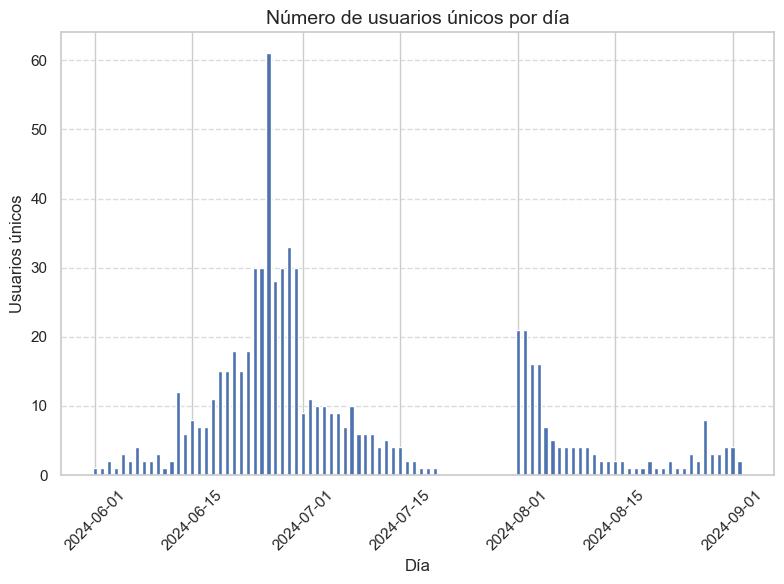

In [298]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(conteo_usuarios['day'], conteo_usuarios['usuarios_unicos'], width=0.6)
plt.title('Número de usuarios únicos por día', fontsize=14)
plt.xlabel('Día', fontsize=12)
plt.ylabel('Usuarios únicos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Como podemos observar no todos los usuarios registran datos todos los días (tal y cómo ocurre en la realidad). En caso de sólo seguir las estrategias de telemedicina normales sería un problema porque perderíamos datos de seguimiento del paciente y las tendencias se estroperían.

## VALIDACIÓN DE DATOS

In [300]:
# Comprobamos que no hay duplicados
duplicates = firstTrimester.duplicated(subset=['user_id', 'timestamp'])
print(f"Número de filas duplicadas: {duplicates.sum()}")

Número de filas duplicadas: 0


In [302]:
firstTrimester = firstTrimester.drop_duplicates(subset=['user_id', 'timestamp'])
firstTrimester.head()

,user_id,Age,timestamp,DiastolicBP,SystolicBP,BS,BodyTemp,HeartRate,day,month&year,date
0,user_0000,32.0,2024-06-16 02:45:05,89.000000,134.000000,148.614941,98.696800,100.000000,2024-06-16,2024-06,2024-06-16
1,user_0000,32.0,2024-06-16 10:45:05,87.000000,130.166667,149.878696,98.711909,108.166667,2024-06-16,2024-06,2024-06-16
2,user_0000,32.0,2024-06-16 18:45:05,87.000000,130.166667,149.878696,98.711909,108.166667,2024-06-16,2024-06,2024-06-16
3,user_0000,31.0,2024-06-18 07:37:54,87.000000,133.000000,159.415316,98.843603,121.000000,2024-06-18,2024-06,2024-06-18
4,user_0000,31.0,2024-06-18 15:37:54,86.333333,131.166667,143.821881,98.870108,102.000000,2024-06-18,2024-06,2024-06-18


In [304]:
def verifica_medidas_porDia(df, user_col='user_id', timestamp_col='timestamp'):
    """
    Verifica si todos los usuarios tienen el mismo número de medidas al día. 
    Args:
        - df: dataframe 
        - user_col: columna con ids usuarios. 
        - timestamp_col : columna con timestamps. 
    Returns: 
        None: imprime resultados. 
    """
     #creamos fecha columna sin las horas
    df[timestamp_col] = pd.to_datetime(df[timestamp_col], errors='coerce', dayfirst=True)

    df['date'] = df[timestamp_col].dt.date
    medidas_porDia = df.groupby([user_col, 'date']).size().reset_index(name='num_medidas')

    #verificar si todos los usuarios tienen mismo num de medidas al día
    medidas_unicas = medidas_porDia['num_medidas'].unique()
    
    if len(medidas_unicas)==1:
        print(f"Todos los usuarios tienen el mismo numero de medidas al día: {medidas_unicas[0]}")
    else:
            print(f"Los usuarios tienen diferentes números de medidas al día:{ medidas_porDia.groupby('num_medidas').size()}")
            plt.hist(medidas_porDia['num_medidas'], bins=range(1, medidas_porDia['num_medidas'].max() + 2), edgecolor='black')
            plt.title("Distribución del número de medidas al día")
            plt.xlabel("Número de medidas al día")
            plt.ylabel("Frecuencia")
            plt.xticks(range(1, medidas_porDia['num_medidas'].max() + 1))
            plt.show()

Los usuarios tienen diferentes números de medidas al día:num_medidas
1     13
2     35
3    623
4      1
dtype: int64


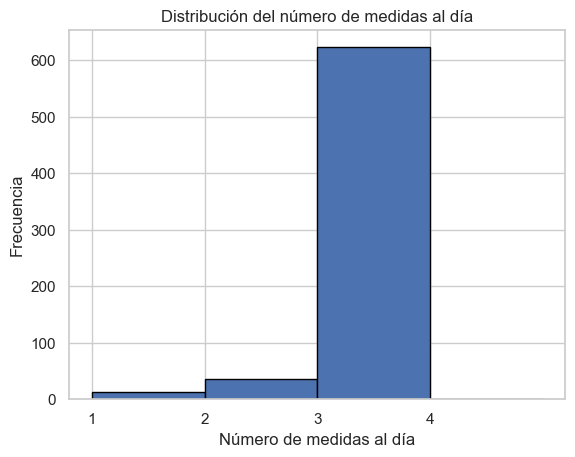

In [306]:
verifica_medidas_porDia(firstTrimester)

En la mayoría los usuarios recogen datos entre 3-4 veces al día. Podemos buscar los que no para completar la entrada a nuesro modelo. 

In [309]:
print(firstTrimester.isnull().sum())

user_id        0
Age            0
timestamp      0
DiastolicBP    0
SystolicBP     0
BS             0
BodyTemp       0
HeartRate      0
day            0
month&year     0
date           0
dtype: int64


Podemos observar que ha surgido un problema añadido, y es que no sólo faltan medidas por día en el usuario, es que no aparecen estas filas con valores NaN para poder rellenar: vamos a reindexar el dataframe para que existan huecos que podamos rellenar.

In [312]:
import wearable_sintetico as ws

# Aplicar la función por usuario y día
# Ordenar el dataframe para que sea más sencillo la ampliación
firstTrimester_expanded = firstTrimester.sort_values(by=['user_id', 'timestamp'])
print(firstTrimester_expanded)

        user_id   Age           timestamp  DiastolicBP  SystolicBP  \
0     user_0000  32.0 2024-06-16 02:45:05    89.000000  134.000000   
1     user_0000  32.0 2024-06-16 10:45:05    87.000000  130.166667   
2     user_0000  32.0 2024-06-16 18:45:05    87.000000  130.166667   
3     user_0000  31.0 2024-06-18 07:37:54    87.000000  133.000000   
4     user_0000  31.0 2024-06-18 15:37:54    86.333333  131.166667   
...         ...   ...                 ...          ...         ...   
1202  user_0099  32.0 2024-06-13 16:00:00    86.333333  131.000000   
1203  user_0099  32.0 2024-06-13 23:22:02    86.333333  131.000000   
1204  user_0099  32.0 2024-06-28 08:00:00    86.333333  131.000000   
1205  user_0099  32.0 2024-06-28 16:00:00    87.000000  130.166667   
1206  user_0099  32.0 2024-06-28 17:20:22    84.000000  134.000000   

              BS   BodyTemp   HeartRate         day month&year        date  
0     148.614941  98.696800  100.000000  2024-06-16    2024-06  2024-06-16  
1    

In [314]:
summary_firstTrimesterExpanded = ws.summarize_missing_values(firstTrimester_expanded)
print(summary_firstTrimesterExpanded)

             missing_count  missing_percentage
user_id                  0                 0.0
Age                      0                 0.0
timestamp                0                 0.0
DiastolicBP              0                 0.0
SystolicBP               0                 0.0
BS                       0                 0.0
BodyTemp                 0                 0.0
HeartRate                0                 0.0
day                      0                 0.0
month&year               0                 0.0
date                     0                 0.0


Ahora podemos insertar datos en las celdads NaN como ya hicimos con el primer mes. Usaremos directamente KNN porque 
ya hemos visto que es el algoritmo que mejor maneja nuestros datos. 

In [317]:
FT_insertion = firstTrimester_expanded.copy()
FT_insertion.head()

,user_id,Age,timestamp,DiastolicBP,SystolicBP,BS,BodyTemp,HeartRate,day,month&year,date
0,user_0000,32.0,2024-06-16 02:45:05,89.000000,134.000000,148.614941,98.696800,100.000000,2024-06-16,2024-06,2024-06-16
1,user_0000,32.0,2024-06-16 10:45:05,87.000000,130.166667,149.878696,98.711909,108.166667,2024-06-16,2024-06,2024-06-16
2,user_0000,32.0,2024-06-16 18:45:05,87.000000,130.166667,149.878696,98.711909,108.166667,2024-06-16,2024-06,2024-06-16
3,user_0000,31.0,2024-06-18 07:37:54,87.000000,133.000000,159.415316,98.843603,121.000000,2024-06-18,2024-06,2024-06-18
4,user_0000,31.0,2024-06-18 15:37:54,86.333333,131.166667,143.821881,98.870108,102.000000,2024-06-18,2024-06,2024-06-18


In [319]:
FT_insertion.drop(columns=['date', 'month&year'], inplace=True)

## INSERICIÓN DE DATOS EN EL DATASET CON KNN

In [322]:
FT_inserted=ws.insercionConKNN(FT_insertion, 6)
FT_inserted.head()


C:\Users\virginia.anton\anaconda3\Lib\site-packages\fancyimpute\solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Imputing row 1/1956 with 0 missing, elapsed time: 0.354
Imputing row 101/1956 with 0 missing, elapsed time: 0.354
Imputing row 201/1956 with 0 missing, elapsed time: 0.354
Imputing row 301/1956 with 0 missing, elapsed time: 0.355
Imputing row 401/1956 with 0 missing, elapsed time: 0.355
Imputing row 501/1956 with 0 missing, elapsed time: 0.355
Imputing row 601/1956 with 0 missing, elapsed time: 0.355
Imputing row 701/1956 with 0 missing, elapsed time: 0.355
Imputing row 801/1956 with 0 missing, elapsed time: 0.357
Imputing row 901/1956 with 0 missing, elapsed time: 0.357
Imputing row 1001/1956 with 0 missing, elapsed time: 0.357
Imputing row 1101/1956 with 0 missing, elapsed time: 0.357
Imputing row 1201/1956 with 0 missing, elapsed time: 0.358
Imputing row 1301/1956 with 0 missing, elapsed time: 0.358
Imputing row 1401/1956 with 0 missing, elapsed time: 0.358
Imputing row 1501/1956 with 0 missing, elapsed time: 0.358
Imputing row 1601/1956 with 0 missing, elapsed time: 0.359
Imputing 

,user_id,Age,timestamp,DiastolicBP,SystolicBP,BS,BodyTemp,HeartRate,day
0,user_0000,32.0,2024-06-16 02:45:05,89.000000,134.000000,148.614941,98.696800,100.000000,2024-06-16
1,user_0000,32.0,2024-06-16 10:45:05,87.000000,130.166667,149.878696,98.711909,108.166667,2024-06-16
2,user_0000,32.0,2024-06-16 18:45:05,87.000000,130.166667,149.878696,98.711909,108.166667,2024-06-16
3,user_0000,31.0,2024-06-18 07:37:54,87.000000,133.000000,159.415316,98.843603,121.000000,2024-06-18
4,user_0000,31.0,2024-06-18 15:37:54,86.333333,131.166667,143.821881,98.870108,102.000000,2024-06-18


Vamos a cambiar el formato de las columnas Age, DiastolicBP, SystolicBP y HeartRate, 
ya que en las  funciones de evaluación de la distribución de nuestros datos declaradas en el notebook de 
wearable_sintetico están en formato  int. 

In [325]:
def  adjust_column_formats(df):
    """
    Ajusta las columnas Age, DiastolicBP, SystolicBP y HeartRate como int. 
    ARGS:
        - df: dataframe a modificar. 
    RETURNS:
        - Dataframe con columnas cambiadas.
        
    """
    df['Age'] = df['Age'].astype(int)
    df['DiastolicBP'] = df['DiastolicBP'].astype(int)
    df['SystolicBP'] = df['SystolicBP'].astype(int)
    df['HeartRate'] = df['HeartRate'].astype(int)

    return df


In [327]:
FT_inserted = adjust_column_formats(FT_inserted)
FT_inserted.head()


,user_id,Age,timestamp,DiastolicBP,SystolicBP,BS,BodyTemp,HeartRate,day
0,user_0000,32,2024-06-16 02:45:05,89,134,148.614941,98.696800,100,2024-06-16
1,user_0000,32,2024-06-16 10:45:05,87,130,149.878696,98.711909,108,2024-06-16
2,user_0000,32,2024-06-16 18:45:05,87,130,149.878696,98.711909,108,2024-06-16
3,user_0000,31,2024-06-18 07:37:54,87,133,159.415316,98.843603,121,2024-06-18
4,user_0000,31,2024-06-18 15:37:54,86,131,143.821881,98.870108,102,2024-06-18


Vamos a convertir los datos de la columna de azúcar en sangre (BS), porque se han generado en mg/dl
y lo queremos pasar a mmol/l

In [331]:
FT_inserted['BS'] = (FT_inserted['BS']/18)
FT_inserted['BS'] = FT_inserted['BS'].round(2)
FT_inserted.head()

,user_id,Age,timestamp,DiastolicBP,SystolicBP,BS,BodyTemp,HeartRate,day
0,user_0000,32,2024-06-16 02:45:05,89,134,8.26,98.696800,100,2024-06-16
1,user_0000,32,2024-06-16 10:45:05,87,130,8.33,98.711909,108,2024-06-16
2,user_0000,32,2024-06-16 18:45:05,87,130,8.33,98.711909,108,2024-06-16
3,user_0000,31,2024-06-18 07:37:54,87,133,8.86,98.843603,121,2024-06-18
4,user_0000,31,2024-06-18 15:37:54,86,131,7.99,98.870108,102,2024-06-18


### COMPROBACIÓN DISTRBUCIÓN DE DATOS

In [333]:
conteo_mensual= ws.count_data_per_month(FT_inserted, 'day')
print(conteo_mensual)

  month&year  conteo
0    2024-06    1169
1    2024-07     336
2    2024-08     435
3    2024-09      16


Vamos a verificar si la mayoría de las medidas se encuentran en 3-4 registros al día,
para ver la calidad de la inserción

Los usuarios tienen diferentes números de medidas al día:num_medidas
1     13
2     35
3    623
4      1
dtype: int64


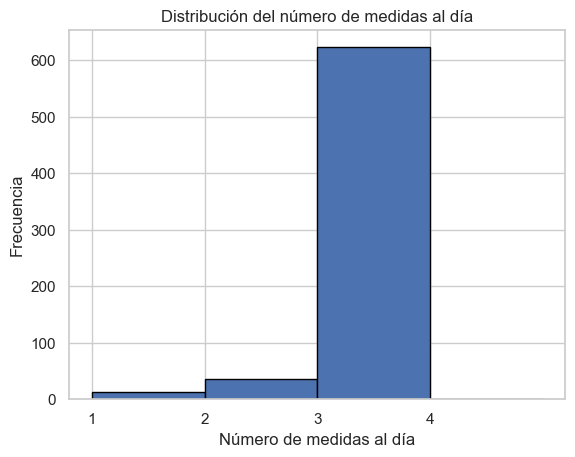

In [336]:
ws.verifica_medidas_porDia(FT_inserted)

Commo vemos, todos los usuarios registraran tres medidas al día, aunque no todos los 
usuarios siguen la misma rutina de registro, unos lo dejan antes de registrar y otros en cambio, 
lo registran durante todo el trimestre. 

In [339]:
FT_inserted.to_csv("firstTrimester_EXPANDED.csv", index=False)

## EVALUACIÓN CALIDAD DATOS DEL DATASET DEL PRIMER TRIMESTRE

### Revisión rangos fisiológicos

In [343]:
ws.verifica_rango(FT_inserted)

- Valores fuera del rango de SystolicBP:149

- Total valores de SystolicBP:1956

- Valores validos de SystolicBP: 1807

- Valores fuera del rango de DiastolicBP:189

- Total valores de DiastolicBP:1956

- Valores validos de DiastolicBP: 1767

- Valores fuera del rango de BodyTemp:244

- Total valores de BodyTemp:1956

- Valores validos de BodyTemp: 1712

- Valores fuera del rango de BS:0

- Total valores de BS:1956

- Valores validos de BS: 1956

- Valores fuera del rango de HeartRate:232

- Total valores de HeartRate:1956

- Valores validos de HeartRate: 1724



In [345]:
FTInserted_validRange = ws.elimina_outliers(FT_inserted)
print(FTInserted_validRange)

        user_id  Age           timestamp  DiastolicBP  SystolicBP    BS  \
0     user_0000   32 2024-06-16 02:45:05           89         134  8.26   
1     user_0000   32 2024-06-16 10:45:05           87         130  8.33   
2     user_0000   32 2024-06-16 18:45:05           87         130  8.33   
3     user_0000   31 2024-06-18 07:37:54           87         133  8.86   
4     user_0000   31 2024-06-18 15:37:54           86         131  7.99   
...         ...  ...                 ...          ...         ...   ...   
1202  user_0099   32 2024-06-13 16:00:00           86         131  8.32   
1203  user_0099   32 2024-06-13 23:22:02           86         131  8.32   
1204  user_0099   32 2024-06-28 08:00:00           86         131  8.32   
1205  user_0099   32 2024-06-28 16:00:00           87         130  8.33   
1206  user_0099   32 2024-06-28 17:20:22           84         134  8.38   

       BodyTemp  HeartRate         day month&year        date  
0     98.696800        100  2024-06

### Consistencia temporal

Verificamos que los registros de cada usuario estén ordenados y estén espaciados entre sí

In [351]:
#registros ordenados entre sí
sorted_check = FTInserted_validRange.groupby('user_id')['timestamp'].apply(lambda x: x.is_monotonic_increasing)
print(sorted_check.value_counts())

timestamp
True    95
Name: count, dtype: int64


Indica que para  los 95 usuarios únicos en el dataset, los valores de la columna timestamp están ordenados, 
de esta forma podemos decir que hay consistencia temporal. 

In [354]:
#Chequeamos que los datos sean consistentes en intervalos de tiempo para cada usuario
FTInserted_validRange['time_diff'] = FTInserted_validRange.groupby('user_id')['timestamp'].diff()
print(FTInserted_validRange['time_diff'].describe())

count                         1438
mean     1 days 05:27:54.818497913
std      3 days 18:46:22.211617827
min                0 days 00:00:41
25%         0 days 06:48:31.500000
50%                0 days 08:00:00
75%                0 days 08:00:00
max               56 days 16:00:24
Name: time_diff, dtype: object


Hay consistencia, los valores de la mediana (8h) y el tercer cuartil (8h) sugieren que la mayoría de los
datos cumplen con un intervalo regular de tiempo, aunque en algunos casos hay variabilidad significativa, 
dado por una desviación estándar alta. 

**Distribución de los datos:**

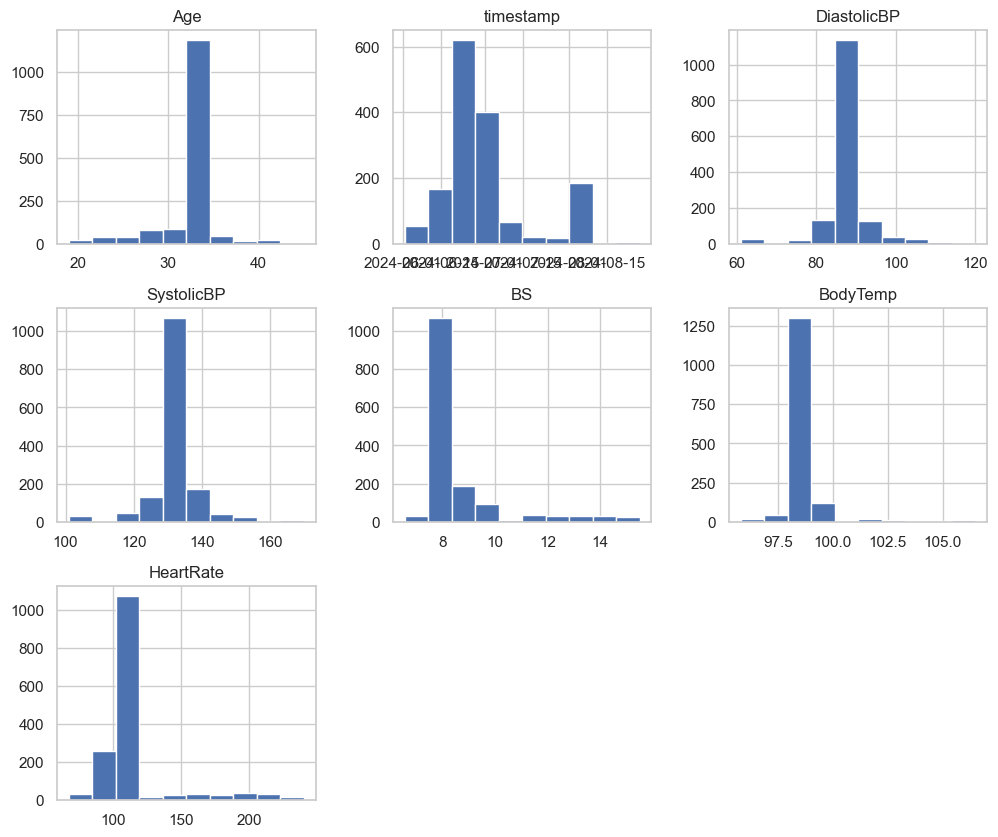

In [360]:
FTInserted_validRange.hist(figsize=(12,10))
plt.show()

**Interpretación de los datos:**

<ol>
    <li>Age:
    <ul>
        <li>La mayoría de la mujeres tienen edades concentradas alrededor de 30 años</li>
        <li>Refleja la tendencia común de hoy en día a retrasar los embarazos de 30 años a edades más avanzadas.</li>
    </ul></li>
    <li>Presión Arterial:
    <ul>
        <li>Se concentran los valores entre 80 y 90 mmHg en la DiastolicBP, algo normal en el primer mes del embarazo.</li>
        <li>Para la sistólica, mayormente netre 120 y 140 mmHg, dentro del rango normal.</li>
    </ul></li>
    <li>Azúcar en sangre:
    <ul>
        <li>Los valore se concentran entre 8 y 10 mmol/l, algo elevado. </li>
        <li>Algunas pacientes podrían mostrar signos tempranos de resistencia a la insulina,probablemente representen 
        diabetes gestacional. </li>
    </ul></li>
    <li>Temperatura corporal:
    <ul>
        <li>La mayoría de los valores se concentran alrededor de 98,6ºF  o 37ºC.</li>
        <li>Sugiere que ninguna mujer presentaba infecciones.</li>
    </ul></li>
    <li>Frecuencia cardíaca:
    <ul>
        <li>Los valores están alrededor de los valores 100 y 120 bpm.</li>
        <li>Los valores son más  elevados de lo normal, pero algo de esperar durante el embarazo.</li>
    </ul></li>
    
</ol>